In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from skopt import BayesSearchCV

import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("../Datasets/training_df_raw.csv")
data.fillna(0, inplace=True)
data.drop(['date', 'time'], axis=1, inplace=True)

In [4]:
X = data.drop('fire', axis=1)
y = data['fire']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_train_pred = knn_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

Training Accuracy: 0.8424


In [9]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0, 1, 0, ..., 1, 1, 0])

Confusion Matrix for KNN:


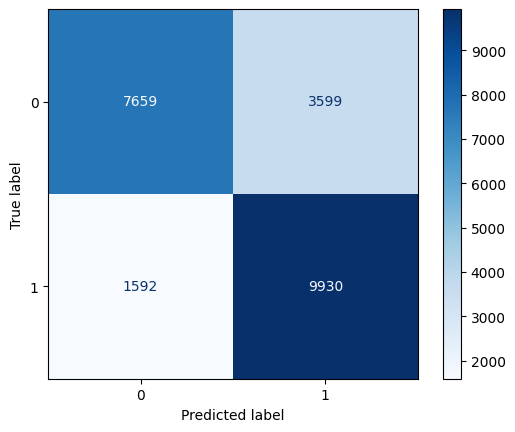

In [10]:
print("Confusion Matrix for KNN:")
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn).plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
print("Classification Metrics for KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

Classification Metrics for KNN:
Accuracy: 0.7721
Precision: 0.7340
Recall: 0.8618
F1 Score: 0.7928


In [12]:
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     11258
           1       0.73      0.86      0.79     11522

    accuracy                           0.77     22780
   macro avg       0.78      0.77      0.77     22780
weighted avg       0.78      0.77      0.77     22780



In [ ]:
param_space_knn = {
    'n_neighbors': (1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

bayes_search_knn = BayesSearchCV(
    estimator=KNeighborsClassifier(),
    search_spaces=param_space_knn,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
bayes_search_knn.fit(X_train, y_train)

c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(5), np.str_('distance')] before, using random point ['euclidean', np.int64(3), 'distance']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1), np.str_('uniform')] before, using random point ['euclidean', np.int64(7), 'distance']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(4), np.str_('distance')] before, using random point ['euclidean'

BayesSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
              random_state=42, scoring='accuracy',
              search_spaces={'metric': ['euclidean', 'manhattan', 'minkowski'],
                             'n_neighbors': (1, 20),
                             'weights': ['uniform', 'distance']})

In [ ]:
best_knn = bayes_search_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test)

In [ ]:
print("Metrics after Bayesian Optimization for KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_tuned):.4f}")

Metrics after Bayesian Optimization for KNN:
Accuracy: 0.7940
Precision: 0.7591
Recall: 0.8682
F1 Score: 0.8100


Confusion Matrix for KNN after tuning:


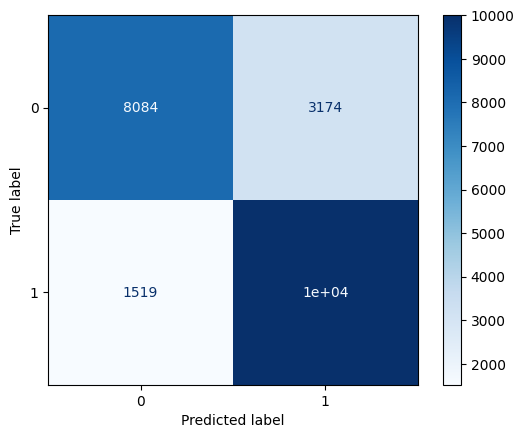

In [ ]:
print("Confusion Matrix for KNN after tuning:")
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot(cmap=plt.cm.Blues)
plt.show()

In [17]:

print("Classification Report for KNN after tuning:")
print(classification_report(y_test, y_pred_knn_tuned))

Classification Report for KNN after tuning:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78     11258
           1       0.76      0.87      0.81     11522

    accuracy                           0.79     22780
   macro avg       0.80      0.79      0.79     22780
weighted avg       0.80      0.79      0.79     22780



In [ ]:
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for KNN: {cv_scores_knn}")

Cross-Validation Scores for KNN: [0.78264925 0.77665587 0.78077155 0.78346046 0.7826922 ]


In [ ]:
print(f"Best Cross-Validation Score for KNN: {cv_scores_knn.max():.4f}")

Best Cross-Validation Score for KNN: 0.7835


KNN AUC-ROC Score: 0.8660


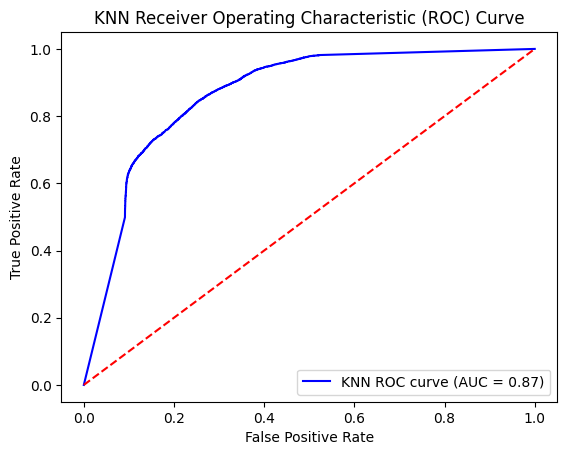

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_scores_knn = best_knn.predict_proba(X_test)[:, 1]

auc_score_knn = roc_auc_score(y_test, y_scores_knn)
print(f"KNN AUC-ROC Score: {auc_score_knn:.4f}")

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'KNN ROC curve (AUC = {auc_score_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
